#**Imports**#

In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from typing import List
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/'ImageProcessing_Assignment.zip (Unzipped Files)'/assignment/

/content/drive/MyDrive/ImageProcessing_Assignment.zip (Unzipped Files)/assignment


#**Image to work on**#

(448, 624, 3)


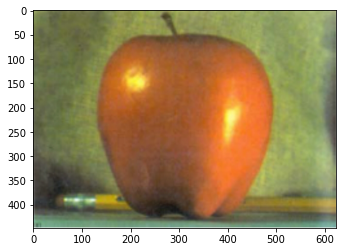

In [111]:
img = cv2.cvtColor(cv2.imread('apple.png'), cv2.COLOR_BGR2RGB) 
plt.imshow(img)
print(img.shape)

#**Algorithm 1. Gaussian pyramid**#

In [143]:
def gaussian_pyramid(img, next, kernel_size):
    #set image parameters
    w = np.power(2, n) * int(img.shape[0] / np.power(2, n))
    h = np.power(2, n) * int(img.shape[1] / np.power(2, n))

    img = img[0:w, 0:h]
    new_img = img.copy()

    pyramid = [new_img]

    #set blurring parameters
    sigma = 0.3 * ((kernel_size - 1) * 0.5 - 1) + 0.8
    kernel = cv2.getGaussianKernel(kernel_size, sigma)

    for i in range(n - 1):
        #blurring
        new_img = cv2.filter2D(new_img, -1, kernel, cv2.BORDER_REPLICATE)
        new_img = cv2.filter2D(new_img, -1, np.transpose(kernel), cv2.BORDER_REPLICATE)
        new_img = new_img[::2, ::2]
        pyramid.append(new_img)

    return pyramid

In [150]:
def show_pyramid(img_path, n):
    #cropped to (256, 256, 3)
    img = cv2.cvtColor(cv2.resize(cv2.imread(img_path), (256,256)), cv2.COLOR_BGR2RGB)  / 255
    print(img.shape)
    h, w = img.shape[:2]
    #kernel_size = 5
    p = gaussian_pyramid(img, n, 5)
    new_h = h
    widths = np.cumsum([w // (2 ** i) for i in range(n)])
    widths = np.hstack([0, widths])
    new_w = widths[-1]
    new_shape = (new_h, new_w, 3)
    #initialization
    new_img = np.zeros(new_shape)

    #filling
    for i in range(n):
        h = p[i].shape[0]
        new_img[:h, widths[i]:widths[i + 1], :] = p[i]

    plt.imshow(new_img)

(256, 256, 3)
Gaussian Pyramid with 4 levels


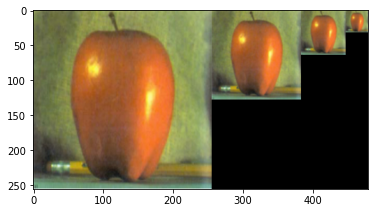

In [151]:
n = 4
img = show_pyramid('apple.png', n)
print("Gaussian Pyramid with %d levels" % n)

#**Algorithm 2. MIPMAP**#

In [199]:
def mipmap(img_path):
    img = cv2.cvtColor(cv2.resize(cv2.imread(img_path), (256,256)), cv2.COLOR_BGR2RGB)
    print(img.shape)
    w, h = img.shape[:2]
    mipmap = np.zeros((w, h * 3 // 2, 3), dtype='uint8')
    mipmap[:, :h, :] = img

    i = 0
    while w > 1:
        #downsampling
        new_w, new_h = img.shape[:2]
        new_img = img.astype('uint16')
        new_img = new_img.reshape(new_w // 2, 2, new_h // 2, 2, 3)
        new_img = new_img.sum(axis=3).sum(axis=1)
        img = ((new_img + 2) >> 2).astype('uint8')
        #replacing
        w = img.shape[0]
        mipmap[i:i + w, h:h + img.shape[1], :] = img
        i += w
   
    plt.imshow(mipmap)

(256, 256, 3)
2
MIPMAP


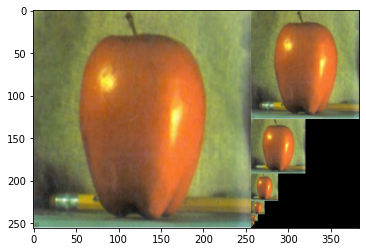

In [200]:
img = mipmap('apple.png')
print("MIPMAP")